# Make histograms

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os

from madminer.ml import EnsembleForge

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')

In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma/'
result_dir = base_dir + 'data/results/wgamma/'

## Without cuts

### Load model

In [23]:
ensemble = EnsembleForge(None, debug=False)

ensemble.load(model_dir + 'sally_ensemble_all')

09:59  Found ensemble with 10 estimators and expectations [[ 0.00185288 -0.00213958]
 [ 0.00030728 -0.00757535]
 [-0.00074987  0.00223898]
 [ 0.00026429 -0.01104142]
 [ 0.00680028  0.00049899]
 [ 0.00879304  0.0024789 ]
 [-0.00781441  0.00571227]
 [ 0.00426772 -0.0017313 ]
 [-0.00439555 -0.0004062 ]
 [-0.00243994  0.00305417]]


### Evaluate score

In [24]:
x_sm = np.load(sample_dir + 'test_sm/x_test.npy')
x_www = np.load(sample_dir + 'test_www/x_test.npy')
x_wwwtilde = np.load(sample_dir + 'test_wwwtilde/x_test.npy')

In [25]:
that_sm, _ = ensemble.evaluate(x_filename=sample_dir + 'test_sm/x_test.npy', calculate_covariance=False)
that_www, _ = ensemble.evaluate(x_filename=sample_dir + 'test_www/x_test.npy', calculate_covariance=False)
that_wwwtilde, _ = ensemble.evaluate(x_filename=sample_dir + 'test_wwwtilde/x_test.npy', calculate_covariance=False)

09:59  Evaluating 10 estimators in ensemble
09:59  Starting evaluation for estimator 1 / 10 in ensemble
09:59  Starting evaluation for estimator 2 / 10 in ensemble
09:59  Starting evaluation for estimator 3 / 10 in ensemble
10:00  Starting evaluation for estimator 4 / 10 in ensemble
10:00  Starting evaluation for estimator 5 / 10 in ensemble
10:00  Starting evaluation for estimator 6 / 10 in ensemble
10:00  Starting evaluation for estimator 7 / 10 in ensemble
10:00  Starting evaluation for estimator 8 / 10 in ensemble
10:00  Starting evaluation for estimator 9 / 10 in ensemble
10:00  Starting evaluation for estimator 10 / 10 in ensemble
10:00  Evaluating 10 estimators in ensemble
10:00  Starting evaluation for estimator 1 / 10 in ensemble
10:00  Starting evaluation for estimator 2 / 10 in ensemble
10:00  Starting evaluation for estimator 3 / 10 in ensemble
10:00  Starting evaluation for estimator 4 / 10 in ensemble
10:00  Starting evaluation for estimator 5 / 10 in ensemble
10:00  Star

In [26]:
theta_sm = np.array([0.,0.])
theta_www = np.array([0.02, 0.])
theta_wwwtilde = np.array([0.,0.02])

### Histograms

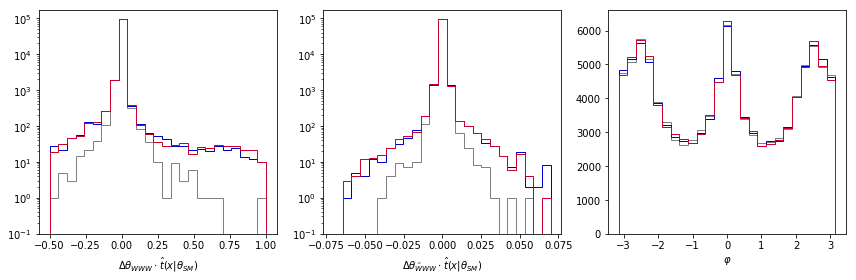

In [35]:
xmin0, xmax0 = -0.5, 1.0
xmin1, xmax1 = -0.07, 0.07
nbins = 25

fig = plt.figure(figsize=(12,4))



ax = plt.subplot(1,3,1)
plt.hist(
    that_sm.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label='SM',
    color='0.5'
)
plt.hist(
    that_www.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label=r'$f_{WWW} = 0.005$',
    color='mediumblue'
)
plt.hist(
    that_wwwtilde.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = 0.005$',
    color='#CC002E'
)
plt.xlabel(r'$\Delta \theta_{WWW} \cdot \hat{t}(x|\theta_{SM})$')
ax.set_yscale("log", nonposy='clip')
plt.ylim(0.1,None)



ax = plt.subplot(1,3,2)
plt.hist(
    that_sm.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label='SM',
    color='0.5'
)
plt.hist(
    that_www.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label=r'$f_{WWW} = 0.005$',
    color='mediumblue'
)
plt.hist(
    that_wwwtilde.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = 0.005$',
    color='#CC002E'
)
plt.xlabel(r'$\Delta \theta_{\tilde{W}WW} \cdot \hat{t}(x|\theta_{SM})$')
ax.set_yscale("log", nonposy='clip')
plt.ylim(0.1,None)



ax = plt.subplot(1,3,3)
plt.hist(
    x_sm[:,26],
    histtype='step',
    range=(-3.14, 3.14),
    bins=nbins,
    label='SM',
    color='0.5'
)
plt.hist(
    x_www[:,26],
    histtype='step',
    range=(-3.14, 3.14),
    bins=nbins,
    label=r'$f_{WWW} = 0.005$',
    color='mediumblue'
)
plt.hist(
    x_wwwtilde[:,26],
    histtype='step',
    range=(-3.14, 3.14),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = 0.005$',
    color='#CC002E'
)
plt.xlabel(r'$\varphi$')



plt.tight_layout()
plt.show()


## With cuts

### Load model

In [37]:
ensemble = EnsembleForge(None, debug=False)

ensemble.load(model_dir + 'sally_ensemble_all_tight')

10:10  Found ensemble with 10 estimators and expectations [[ 0.01191214 -0.0402671 ]
 [ 0.02071318 -0.00683478]
 [ 0.03724478 -0.02515701]
 [ 0.04550327  0.23156701]
 [ 0.08020136 -0.02802361]
 [ 0.13473636  0.02368452]
 [ 0.02685713  0.03358454]
 [ 0.04259032  0.01201156]
 [ 0.0381263   0.09408886]
 [-0.00695528 -0.04690658]]


### Evaluate score

In [52]:
x_sm = np.load(sample_dir + 'test_sm_tight/x_test.npy')
x_www = np.load(sample_dir + 'test_www_small_tight/x_test.npy')
x_wwwtilde = np.load(sample_dir + 'test_wwwtilde_small_tight/x_test.npy')
x_www_n = np.load(sample_dir + 'test_www_smallnegative_tight/x_test.npy')
x_wwwtilde_n = np.load(sample_dir + 'test_wwwtilde_smallnegative_tight/x_test.npy')

In [53]:
that_sm, _ = ensemble.evaluate(x_filename=sample_dir + 'test_sm_tight/x_test.npy', calculate_covariance=False)
that_www, _ = ensemble.evaluate(x_filename=sample_dir + 'test_www_small_tight/x_test.npy', calculate_covariance=False)
that_www_n, _ = ensemble.evaluate(x_filename=sample_dir + 'test_www_smallnegative_tight/x_test.npy', calculate_covariance=False)
that_wwwtilde, _ = ensemble.evaluate(x_filename=sample_dir + 'test_wwwtilde_small_tight/x_test.npy', calculate_covariance=False)
that_wwwtilde_n, _ = ensemble.evaluate(x_filename=sample_dir + 'test_wwwtilde_smallnegative_tight/x_test.npy', calculate_covariance=False)

10:39  Evaluating 10 estimators in ensemble
10:39  Starting evaluation for estimator 1 / 10 in ensemble
10:39  Starting evaluation for estimator 2 / 10 in ensemble
10:39  Starting evaluation for estimator 3 / 10 in ensemble
10:39  Starting evaluation for estimator 4 / 10 in ensemble
10:39  Starting evaluation for estimator 5 / 10 in ensemble
10:39  Starting evaluation for estimator 6 / 10 in ensemble
10:39  Starting evaluation for estimator 7 / 10 in ensemble
10:39  Starting evaluation for estimator 8 / 10 in ensemble
10:39  Starting evaluation for estimator 9 / 10 in ensemble
10:39  Starting evaluation for estimator 10 / 10 in ensemble
10:39  Evaluating 10 estimators in ensemble
10:39  Starting evaluation for estimator 1 / 10 in ensemble
10:39  Starting evaluation for estimator 2 / 10 in ensemble
10:39  Starting evaluation for estimator 3 / 10 in ensemble
10:39  Starting evaluation for estimator 4 / 10 in ensemble
10:39  Starting evaluation for estimator 5 / 10 in ensemble
10:39  Star

In [48]:
theta_sm = np.array([0.,0.])
theta_www = np.array([0.005, 0.])
theta_wwwtilde = np.array([0.,0.005])

### Histograms

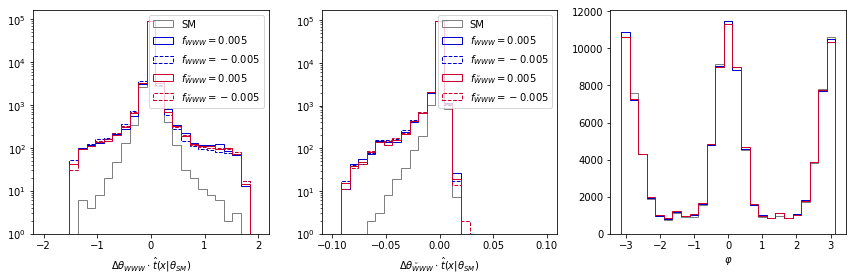

In [55]:
xmin0, xmax0 = -2., 2.
xmin1, xmax1 = -0.1, 0.1
nbins = 25

fig = plt.figure(figsize=(12,4))



ax = plt.subplot(1,3,1)
plt.hist(
    that_sm.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label='SM',
    color='0.5'
)
plt.hist(
    that_www.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label=r'$f_{WWW} = 0.005$',
    color='mediumblue'
)
plt.hist(
    that_www_n.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label=r'$f_{WWW} = -0.005$',
    color='mediumblue',
    ls='--'
)
plt.hist(
    that_wwwtilde.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = 0.005$',
    color='#CC002E'
)
plt.hist(
    that_wwwtilde_n.dot(theta_www),
    histtype='step',
    range=(xmin0, xmax0),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = -0.005$',
    color='#CC002E',
    ls='--'
)
plt.legend()
plt.xlabel(r'$\Delta \theta_{WWW} \cdot \hat{t}(x|\theta_{SM})$')
ax.set_yscale("log", nonposy='clip')
plt.ylim(1.,None)



ax = plt.subplot(1,3,2)
plt.hist(
    that_sm.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label='SM',
    color='0.5'
)
plt.hist(
    that_www.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label=r'$f_{WWW} = 0.005$',
    color='mediumblue'
)
plt.hist(
    that_www_n.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label=r'$f_{WWW} = -0.005$',
    color='mediumblue',
    ls='--'
)
plt.hist(
    that_wwwtilde.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = 0.005$',
    color='#CC002E'
)
plt.hist(
    that_wwwtilde_n.dot(theta_wwwtilde),
    histtype='step',
    range=(xmin1, xmax1),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = -0.005$',
    color='#CC002E',
    ls='--'
)
plt.legend()
plt.xlabel(r'$\Delta \theta_{\tilde{W}WW} \cdot \hat{t}(x|\theta_{SM})$')
ax.set_yscale("log", nonposy='clip')
plt.ylim(1.,None)



ax = plt.subplot(1,3,3)
plt.hist(
    x_sm[:,26],
    histtype='step',
    range=(-3.14, 3.14),
    bins=nbins,
    label='SM',
    color='0.5'
)
plt.hist(
    x_www[:,26],
    histtype='step',
    range=(-3.14, 3.14),
    bins=nbins,
    label=r'$f_{WWW} = 0.005$',
    color='mediumblue'
)
plt.hist(
    x_wwwtilde[:,26],
    histtype='step',
    range=(-3.14, 3.14),
    bins=nbins,
    label=r'$f_{\tilde{W}WW} = 0.005$',
    color='#CC002E'
)
plt.xlabel(r'$\varphi$')



plt.tight_layout()
plt.show()
